# Clean Data of the results of experiment 5
- This program is used to export the txt file to dataframe in python. The txt is captured from the experiment#5 in Github. File location : https://github.com/tawanmeow/privacy-sdn-logfile/tree/main/Experiment5

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

## Input filename that you want to clean data

In [2]:
# this pandas version dose not support directlly loading the file from url.
url = 'https://github.com/tawanmeow/privacy-sdn-logfile/tree/main/Experiment5'
filename = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment5/test5_5cm.txt"

## Functions for getting the throughput data from dataframe df

In [3]:
def getDataframeThru(df,start_row,measurement_interval,header_range):
    '''
    This functions will import the data from txt file and return the dataframe without the header of txt file.
    Input: 
        measurement_interval = 30 (sec) : 
        header_range = 10 lines
        start_row = 0 
    Return: 
        df1t : dataframe of througput and jitter
    '''
    
    df1 = df.drop(labels=range(start_row, header_range), axis=0)
    df1t = df1.drop(labels=range(measurement_interval, len(df)), axis=0)
    
    return df1t

In [4]:
def getDatafromTxT(filename, headerrange):
    """
    Get dataframe from txt file:
    filename : xxx.txt
    headerrange : number of lines that needed to be removed. 
    
    return : df : datafame type
    """
    h = headerrange + 1
    skip_1 = list(range(0,h, 1))
    df = pd.read_csv(filename,
        skiprows=skip_1,
        header=None,
        delimiter=' ',
        skipinitialspace=True,
        error_bad_lines=False)
    return df
    

## Run functions: 

In [5]:
headerrange = 10
filename = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment5/test5_5cm.txt"

df = getDatafromTxT(filename, headerrange)
print(df.head)

<bound method NDFrame.head of     0    1            2         3        4       5           6          7   \
0    [   5]    0.00-1.00       sec     3.95  MBytes        33.1  Mbits/sec   
1    [   5]    1.00-2.00       sec     3.98  MBytes        33.4  Mbits/sec   
2    [   5]    2.00-3.00       sec     4.02  MBytes        33.7  Mbits/sec   
3    [   5]    3.00-4.00       sec     4.03  MBytes        33.8  Mbits/sec   
4    [   5]    4.00-5.00       sec     4.01  MBytes        33.7  Mbits/sec   
..  ..  ...          ...       ...      ...     ...         ...        ...   
369  [   5]  27.00-28.00       sec     3.97  MBytes        33.3  Mbits/sec   
370  [   5]  28.00-29.00       sec     3.92  MBytes        32.9  Mbits/sec   
371  [   5]  29.00-30.00       sec     3.94  MBytes        33.0  Mbits/sec   
372  [   5]  30.00-30.04       sec      170  KBytes        32.4  Mbits/sec   
373  [  ID]     Interval  Transfer  Bitrate  Jitter  Lost/Total  Datagrams   

        8    9       10    11  
0

b'Skipping line 43: expected 12 fields, saw 25\nSkipping line 45: expected 12 fields, saw 13\nSkipping line 83: expected 12 fields, saw 25\nSkipping line 85: expected 12 fields, saw 13\nSkipping line 123: expected 12 fields, saw 25\nSkipping line 125: expected 12 fields, saw 13\nSkipping line 163: expected 12 fields, saw 25\nSkipping line 165: expected 12 fields, saw 13\nSkipping line 203: expected 12 fields, saw 25\nSkipping line 205: expected 12 fields, saw 13\nSkipping line 243: expected 12 fields, saw 25\nSkipping line 245: expected 12 fields, saw 13\nSkipping line 283: expected 12 fields, saw 25\nSkipping line 285: expected 12 fields, saw 13\nSkipping line 323: expected 12 fields, saw 25\nSkipping line 325: expected 12 fields, saw 13\nSkipping line 363: expected 12 fields, saw 25\nSkipping line 365: expected 12 fields, saw 13\nSkipping line 403: expected 12 fields, saw 25\nSkipping line 405: expected 12 fields, saw 13\n'


In [6]:
## Find start row index of itteration
def getStartEndID(df,start_data,end_data):
    """
    to clean dataframe and return the data with new header
    Input: 
        df : datafram without header of txt file 
    Output
        strat_indices_list : start indices list
    """
    # creating and passing series to new column
    df["Start"]= df[2].str.find(start_data)
    df["End"]= df[2].str.find(end_data)

    index = df.index
    strat_indices = index[df["Start"]==0.0]
    strat_indices_list = strat_indices.tolist()
    end_indices = index[df["End"]==0.0]
    end_indices_list = end_indices.tolist()
    
    
    return strat_indices_list, end_indices_list
    

In [7]:
def getCleanData(df,strat_indices_list,end_indices_list):
    """
    
    """
    df_all = df.drop(labels=range(1, len(df)), axis=0) # create new df
    start_row = 0
    c = 0
    for i in strat_indices_list: 
        
        h = i
        print('h =',h)
        m = end_indices_list[c]
        print('m =', m)
        df1 = getDataframeThru(df,start_row,m,h)
        print('df1 = ', df1)
        result = pd.concat([df_all,df1])
        df_all = result
        c = c + 1
        if i == 0:
            
            df_all = df_all.drop(labels=0, axis=0)
        
        
    return df_all

## Run functions

In [8]:
start_data = '0.00-1.00'
end_data = '29.00-30.00'
strat_indices_list, end_indices_list = getStartEndID(df,start_data,end_data)
print('strat_indices_list: ', strat_indices_list)
print('end_indices_list: ', end_indices_list)
df_all = getCleanData(df,strat_indices_list,end_indices_list)

strat_indices_list:  [0, 38, 76, 114, 152, 190, 228, 266, 304, 342]
end_indices_list:  [29, 67, 105, 143, 181, 219, 257, 295, 333, 371]
h = 0
m = 29
df1 =      0   1            2    3     4       5     6          7      8   9      10  \
0   [  5]    0.00-1.00  sec  3.95  MBytes  33.1  Mbits/sec  0.490  ms  0/2861   
1   [  5]    1.00-2.00  sec  3.98  MBytes  33.4  Mbits/sec  0.672  ms  0/2884   
2   [  5]    2.00-3.00  sec  4.02  MBytes  33.7  Mbits/sec  0.773  ms  0/2908   
3   [  5]    3.00-4.00  sec  4.03  MBytes  33.8  Mbits/sec  0.507  ms  0/2918   
4   [  5]    4.00-5.00  sec  4.01  MBytes  33.7  Mbits/sec  0.522  ms  0/2905   
5   [  5]    5.00-6.00  sec  3.93  MBytes  33.0  Mbits/sec  0.691  ms  0/2847   
6   [  5]    6.00-7.00  sec  3.87  MBytes  32.5  Mbits/sec  0.625  ms  0/2802   
7   [  5]    7.00-8.00  sec  4.00  MBytes  33.6  Mbits/sec  0.614  ms  0/2898   
8   [  5]    8.00-9.00  sec  3.88  MBytes  32.6  Mbits/sec  0.549  ms  0/2811   
9   [  5]   9.00-10.00  sec  3.91 

print(df_all)

In [9]:
# Replace new columns header

df_all_new = df_all.drop(df_all.columns[[0,1,3, 5,7,9,11]], axis=1)  


In [10]:
df_all_new.rename({2 :'Interval', 4 : 'Transfer', 6 :'Bitrate', 8 :'Jitter', 10 :'Lost/Total Datagrams'}, axis=1, inplace=True)


In [11]:
print(df_all_new)

        Interval Transfer Bitrate Jitter Lost/Total Datagrams  Start  End
1      1.00-2.00     3.98    33.4  0.672               0/2884   -1.0 -1.0
2      2.00-3.00     4.02    33.7  0.773               0/2908   -1.0 -1.0
3      3.00-4.00     4.03    33.8  0.507               0/2918   -1.0 -1.0
4      4.00-5.00     4.01    33.7  0.522               0/2905   -1.0 -1.0
5      5.00-6.00     3.93    33.0  0.691               0/2847   -1.0 -1.0
..           ...      ...     ...    ...                  ...    ...  ...
366  24.00-25.00     3.88    32.5  0.507               0/2810   -1.0 -1.0
367  25.00-26.00     3.86    32.4  0.631               0/2797   -1.0 -1.0
368  26.00-27.00     3.93    33.0  0.579               0/2849   -1.0 -1.0
369  27.00-28.00     3.97    33.3  0.613               0/2876   -1.0 -1.0
370  28.00-29.00     3.92    32.9  0.650               0/2842   -1.0 -1.0

[289 rows x 7 columns]


In [12]:
# export dataframe to csv 
filename_csv = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment5/test5_5cm.csv"
df_all_new.to_csv(filename_csv)

# Plot dataframe

In [13]:
print(df_all_new['Bitrate'])

1      33.4
2      33.7
3      33.8
4      33.7
5      33.0
       ... 
366    32.5
367    32.4
368    33.0
369    33.3
370    32.9
Name: Bitrate, Length: 289, dtype: object


In [14]:
df_all_new['Bitrate'] = df_all_new['Bitrate'].astype(float) 

In [16]:
print(len(df_all_new.index))
time = np.array(range(len(df_all_new.index)))
print(time)

df_all_new['Time'] = time
print(df_all_new.head)
df_all_new['Time'] = df_all_new['Time'].astype(int) 


289
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

## Throughput

In [17]:
# avergae throughput 
sumThroughput = df_all_new['Bitrate'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Throughput :', avgSumThroughput)
print('var Throughput :', df_all_new['Bitrate'].var())

avg Throughput : 32.63840830449827
var Throughput : 0.8921655132641261


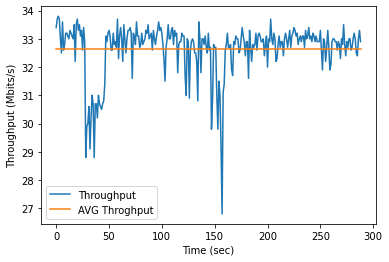

In [18]:
# Throughput 
ax = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Bitrate', ax =ax)
plt.legend(["Throughput"]);
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Throughput (Mbits/s)")
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
s = pd.DataFrame(avg_thr, columns = ['AVG Throghput'])
s.plot(ax=ax)
plt.show()

## Jitter